In [46]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('data/train.csv')
target = pd.read_csv('data/train_target.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)



(1560699, 24)
wagnum                 int64
prev_fr_id             int64
prev_is_load         float64
prev_date_depart      object
prev_date_arrival     object
prev_snd_org_id        int64
prev_rsv_org_id        int64
prev_distance        float64
snd_st_id              int64
rsv_st_id              int64
fr_id                  int64
is_load                int64
date_depart           object
rod                    int64
common_ch            float64
vidsobst              object
snd_org_id             int64
rsv_org_id             int64
distance             float64
prev_freight          object
prev_fr_group         object
freight               object
fr_group              object
target               float64
dtype: object
['wagnum' 'prev_fr_id' 'prev_is_load' 'prev_snd_org_id' 'prev_rsv_org_id'
 'prev_distance' 'snd_st_id' 'rsv_st_id' 'fr_id' 'is_load' 'rod'
 'common_ch' 'snd_org_id' 'rsv_org_id' 'distance' 'target']


In [2]:
df_test = pd.read_csv('data/test.csv')

In [3]:
df_test

,Unnamed: 0,wagnum,prev_fr_id,prev_is_load,prev_date_depart,prev_date_arrival,prev_snd_org_id,prev_rsv_org_id,prev_distance,snd_st_id,...,rod,common_ch,vidsobst,snd_org_id,rsv_org_id,distance,prev_freight,prev_fr_group,freight,fr_group
0,0,11,3399285,1.0,2022-11-09 07:45:00,2022-11-12 00:57:00,4272291,5236848,656.0,1453117,...,8,9.0,Собственные,2327070,6683733,3723.0,ПЛИТЫ ДВП,Лесные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
1,1,11,3642924,1.0,2022-11-25 18:46:00,2022-12-01 16:55:00,6683733,2661726,4004.0,7794458,...,8,9.0,Собственные,2327070,3601745,302.0,БАНКЕТКИ,Остальные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
2,2,11,8936509,1.0,2022-12-27 09:04:00,2022-12-29 18:34:00,3601745,4540052,267.0,1597089,...,8,9.0,Собственные,2327070,699208,1968.0,ЧЕЧЕВИЦА,Хлебные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
3,3,276,3821223,1.0,2022-11-04 13:56:00,2022-11-07 02:02:00,4597939,4097118,1112.0,4224949,...,8,9.0,Принятые в аренду,2327070,4597939,1112.0,ОРЕХИ МИНДАЛЬН,Остальные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
4,4,276,8631635,1.0,2022-12-05 17:54:00,2022-12-10 21:15:00,5042377,8445007,2198.0,4166442,...,8,9.0,Принятые в аренду,8445007,9932239,584.0,КАРТОН ПР,Остальные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221081,221081,9999730,7003547,1.0,2022-11-13 01:10:00,2022-11-17 12:28:00,4266126,7290981,1844.0,9967639,...,8,9.0,Собственные,7290981,8035951,2679.0,ПАРКЕТ,Лесные грузы,КРОВАТИ ДЕР ВС,Остальные грузы
221082,221082,9999859,292757,1.0,2022-10-31 01:40:00,2022-10-31 10:55:00,4533990,9321847,204.0,4985724,...,8,975.0,Собственные,9321847,4272291,3584.0,БАНКЕТКИ,Остальные грузы,ГАРНИТУРЫ КУХОН,Остальные грузы
221083,221083,9999859,7399715,1.0,2022-11-13 16:30:00,2022-11-18 12:11:00,4272291,9162812,1315.0,5029245,...,8,975.0,Собственные,2327070,4570269,152.0,ЛЕСМАТ СВ 2М,Лесные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
221084,221084,9999859,1399685,0.0,2022-11-27 20:14:00,2022-12-03 00:13:00,2327070,4533990,4480.0,3609555,...,8,975.0,Собственные,4533990,987513,5906.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,МЕБЕЛЬ КР МЕТАЛ,Остальные грузы


In [4]:
time = ['prev_date_depart', 'prev_date_arrival', 'date_depart']
categorical = ['prev_freight', 'freight', 'fr_group', 'prev_fr_group', 'vidsobst']

In [5]:
print(len(numeric_cols))
print('Nums:  ', numeric_cols)
print(len(categorical))
print('Categ:  ', categorical)
print(len(time))
print('Time:  ', time)

16
Nums:   ['wagnum' 'prev_fr_id' 'prev_is_load' 'prev_snd_org_id' 'prev_rsv_org_id'
 'prev_distance' 'snd_st_id' 'rsv_st_id' 'fr_id' 'is_load' 'rod'
 'common_ch' 'snd_org_id' 'rsv_org_id' 'distance' 'target']
5
Categ:   ['prev_freight', 'freight', 'fr_group', 'prev_fr_group', 'vidsobst']
3
Time:   ['prev_date_depart', 'prev_date_arrival', 'date_depart']


In [6]:
df

,wagnum,prev_fr_id,prev_is_load,prev_date_depart,prev_date_arrival,prev_snd_org_id,prev_rsv_org_id,prev_distance,snd_st_id,rsv_st_id,...,common_ch,vidsobst,snd_org_id,rsv_org_id,distance,prev_freight,prev_fr_group,freight,fr_group,target
0,11,1399685,0.0,2022-03-30 22:55:00,2022-04-05 11:07:00,4266126,2279057,4493.0,3609555,4985724,...,9.0,Собственные,2279057,9321847,269.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,БАНКЕТКИ,Остальные грузы,45.0
1,11,292757,1.0,2022-04-07 08:45:00,2022-04-07 18:22:00,2279057,9321847,269.0,4985724,2492408,...,9.0,Собственные,9321847,4272291,3584.0,БАНКЕТКИ,Остальные грузы,ГАРНИТУРЫ КУХОН,Остальные грузы,85.0
2,11,8674472,1.0,2022-04-11 07:30:00,2022-04-20 15:15:00,9321847,4272291,3584.0,2492408,4288665,...,9.0,Собственные,4272291,2555202,417.0,ГАРНИТУРЫ КУХОН,Остальные грузы,КАРНИЗЫ ДЕРЕВ,Лесные грузы,73.0
3,11,8210522,1.0,2022-04-23 16:20:00,2022-04-28 03:43:00,4272291,2555202,417.0,4288665,2440270,...,9.0,Собственные,2327070,2327070,248.0,КАРНИЗЫ ДЕРЕВ,Лесные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,131.0
4,11,1399685,0.0,2022-05-03 14:47:00,2022-05-04 05:11:00,2327070,2327070,248.0,2440270,2440270,...,9.0,Собственные,2327070,2487325,5.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,ВАТА МЕД,Остальные грузы,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560694,9999859,1399685,0.0,2022-09-19 06:30:00,2022-09-19 18:01:00,2327070,7093343,276.0,7192993,2055213,...,975.0,Собственные,6622805,1839608,2061.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,ОРЕХИ МИНДАЛЬН,Остальные грузы,69.0
1560695,9999859,1399685,0.0,2022-10-02 03:16:00,2022-10-04 21:16:00,2327070,1920890,2262.0,9981486,2492408,...,975.0,Собственные,1920890,4272291,3766.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,БАНКЕТКИ,Остальные грузы,21.0
1560696,9999859,292757,1.0,2022-10-05 19:03:00,2022-10-12 05:50:00,1920890,4272291,3766.0,2492408,6256141,...,975.0,Собственные,4272291,1498556,772.0,БАНКЕТКИ,Остальные грузы,САЖЕНЦЫ ВС,Остальные грузы,89.0
1560697,9999859,5595850,1.0,2022-10-15 23:25:00,2022-10-20 11:41:00,4272291,1498556,772.0,6256141,9449707,...,975.0,Собственные,2327070,4533990,3209.0,САЖЕНЦЫ ВС,Остальные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,31.0


<AxesSubplot: >

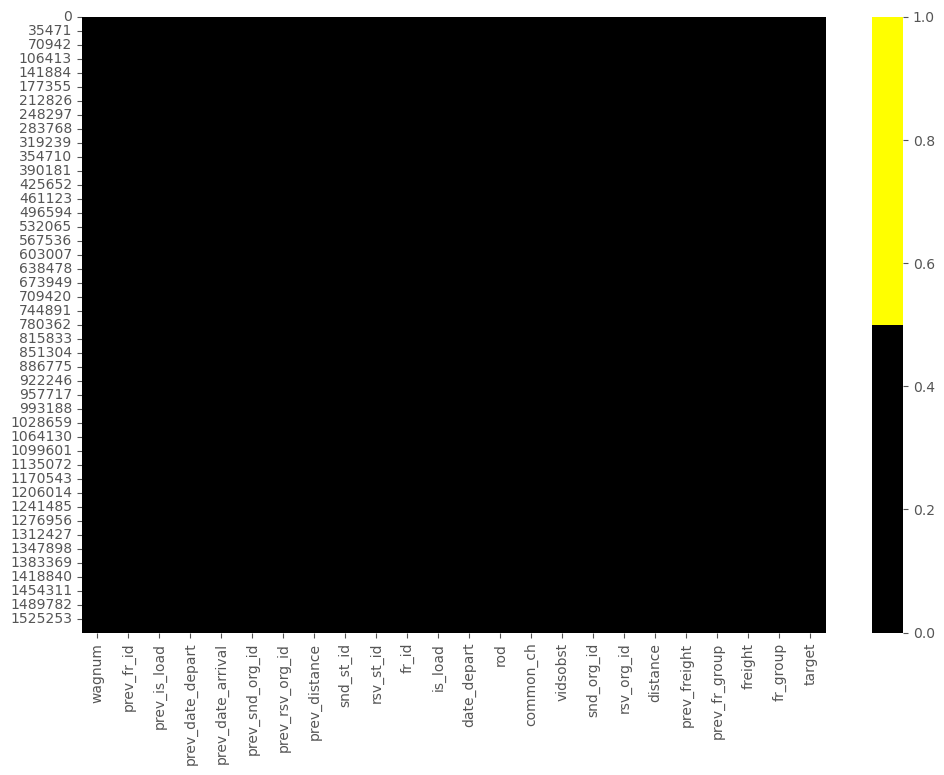

In [7]:
cols = df.columns 

colours = ['#000000', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

wagnum - 0%
prev_fr_id - 0%
prev_is_load - 0%
prev_date_depart - 0%
prev_date_arrival - 0%
prev_snd_org_id - 0%
prev_rsv_org_id - 0%
prev_distance - 0%
snd_st_id - 0%
rsv_st_id - 0%
fr_id - 0%
is_load - 0%
date_depart - 0%
rod - 0%
common_ch - 0%
vidsobst - 0%
snd_org_id - 0%
rsv_org_id - 0%
distance - 0%
prev_freight - 0%
prev_fr_group - 0%
freight - 0%
fr_group - 0%
target - 0%


created missing indicator for: prev_date_depart
created missing indicator for: prev_date_arrival
created missing indicator for: prev_distance
created missing indicator for: distance
created missing indicator for: prev_freight
created missing indicator for: prev_fr_group
created missing indicator for: freight
created missing indicator for: fr_group
created missing indicator for: target


<AxesSubplot: xlabel='index'>

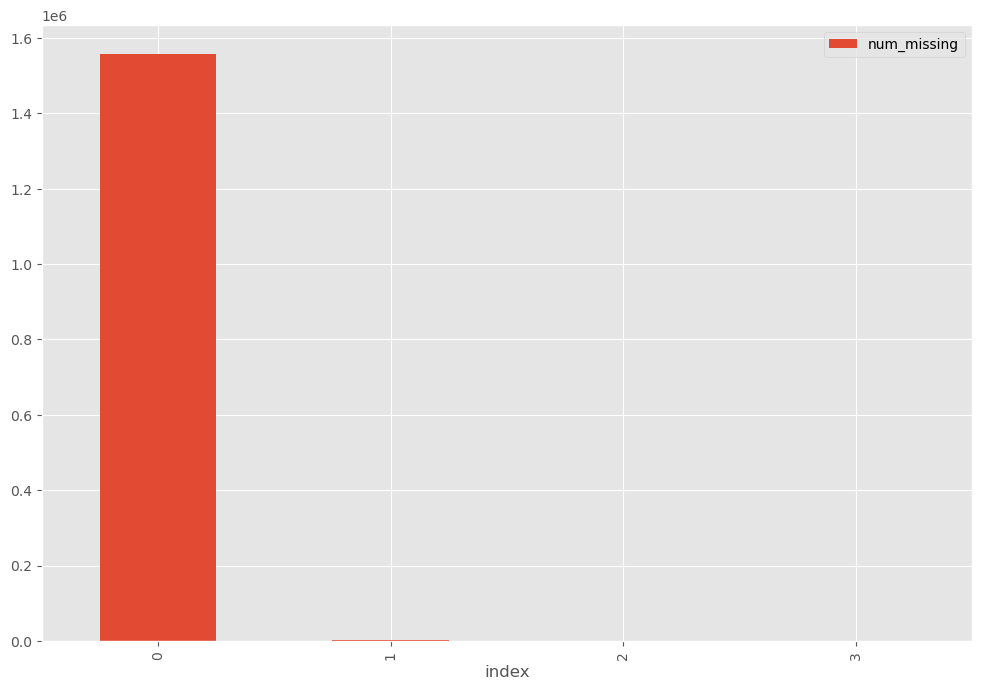

In [9]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [10]:
df = df.dropna()

In [11]:
df

,wagnum,prev_fr_id,prev_is_load,prev_date_depart,prev_date_arrival,prev_snd_org_id,prev_rsv_org_id,prev_distance,snd_st_id,rsv_st_id,...,prev_date_depart_ismissing,prev_date_arrival_ismissing,prev_distance_ismissing,distance_ismissing,prev_freight_ismissing,prev_fr_group_ismissing,freight_ismissing,fr_group_ismissing,target_ismissing,num_missing
0,11,1399685,0.0,2022-03-30 22:55:00,2022-04-05 11:07:00,4266126,2279057,4493.0,3609555,4985724,...,False,False,False,False,False,False,False,False,False,0
1,11,292757,1.0,2022-04-07 08:45:00,2022-04-07 18:22:00,2279057,9321847,269.0,4985724,2492408,...,False,False,False,False,False,False,False,False,False,0
2,11,8674472,1.0,2022-04-11 07:30:00,2022-04-20 15:15:00,9321847,4272291,3584.0,2492408,4288665,...,False,False,False,False,False,False,False,False,False,0
3,11,8210522,1.0,2022-04-23 16:20:00,2022-04-28 03:43:00,4272291,2555202,417.0,4288665,2440270,...,False,False,False,False,False,False,False,False,False,0
4,11,1399685,0.0,2022-05-03 14:47:00,2022-05-04 05:11:00,2327070,2327070,248.0,2440270,2440270,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560694,9999859,1399685,0.0,2022-09-19 06:30:00,2022-09-19 18:01:00,2327070,7093343,276.0,7192993,2055213,...,False,False,False,False,False,False,False,False,False,0
1560695,9999859,1399685,0.0,2022-10-02 03:16:00,2022-10-04 21:16:00,2327070,1920890,2262.0,9981486,2492408,...,False,False,False,False,False,False,False,False,False,0
1560696,9999859,292757,1.0,2022-10-05 19:03:00,2022-10-12 05:50:00,1920890,4272291,3766.0,2492408,6256141,...,False,False,False,False,False,False,False,False,False,0
1560697,9999859,5595850,1.0,2022-10-15 23:25:00,2022-10-20 11:41:00,4272291,1498556,772.0,6256141,9449707,...,False,False,False,False,False,False,False,False,False,0


In [12]:
numeric_cols

array(['wagnum', 'prev_fr_id', 'prev_is_load', 'prev_snd_org_id',
       'prev_rsv_org_id', 'prev_distance', 'snd_st_id', 'rsv_st_id',
       'fr_id', 'is_load', 'rod', 'common_ch', 'snd_org_id', 'rsv_org_id',
       'distance', 'target'], dtype=object)

<AxesSubplot: >

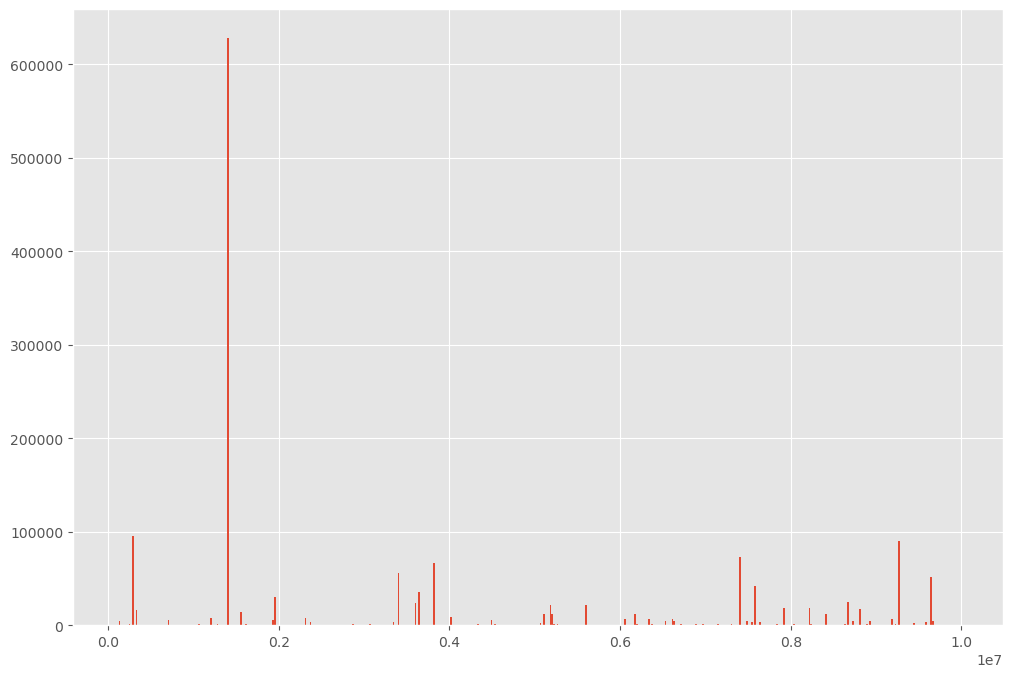

In [13]:
# prev_fr_id - идентификатор предыдущего груза
df['prev_fr_id'].hist(bins=500)

In [14]:
df['prev_fr_id'].value_counts()

1399685    627547
292757      95151
9276341     89764
3821223     66278
7399715     53362
            ...  
4642413         1
6738488         1
1222358         1
2385389         1
1672690         1
Name: prev_fr_id, Length: 288, dtype: int64

In [15]:
# prev_freight - наименование предыдущего груза, 
df['prev_freight'].value_counts()

ГАЗЫ УГЛЕВОД ПР    627547
БАНКЕТКИ           186285
ЛЕСМАТ СВ 2М       100848
ВАТА МЕД            89764
ОРЕХИ МИНДАЛЬН      78608
                    ...  
МОНОКОРУНД              1
ШПАЛЫ ЖЕЛЕЗБЕТ          1
ЦЕЛЛЮЛОЗА СУЛЬФ         1
БЕНЗОЛ                  1
РУДЫ ДРАГМЕТ            1
Name: prev_freight, Length: 150, dtype: int64

In [16]:
# prev_fr_group - наименование предыдущей группы груза, 
df['prev_fr_group'].value_counts()

Нефтяные грузы          632685
Остальные грузы         540937
Лесные грузы            288746
Хлебные грузы            77497
Руды  всякие             10169
Минерально-строит.        6640
Уголь каменный             509
Кокс каменноугольный       243
Name: prev_fr_group, dtype: int64

<AxesSubplot: >

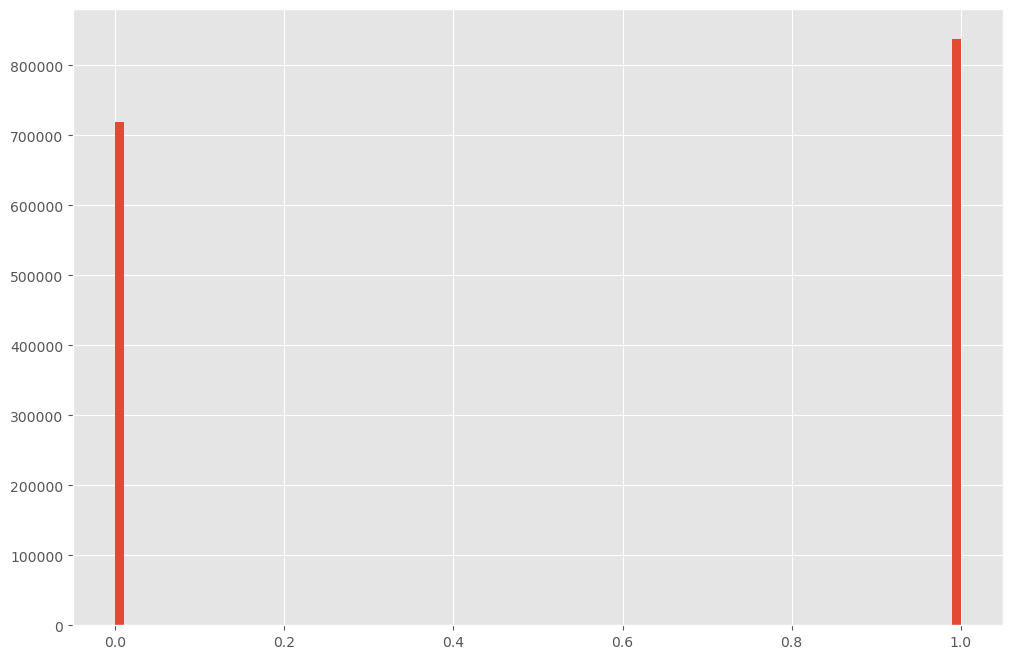

In [17]:
# prev_is_load - признак гружености предыдущего рейса (1 -  груженый, 0 -  порожний)
df['prev_is_load'].hist(bins=100)

In [18]:
df[['prev_is_load', 'prev_freight']]

,prev_is_load,prev_freight
0,0.0,ГАЗЫ УГЛЕВОД ПР
1,1.0,БАНКЕТКИ
2,1.0,ГАРНИТУРЫ КУХОН
3,1.0,КАРНИЗЫ ДЕРЕВ
4,0.0,ГАЗЫ УГЛЕВОД ПР
...,...,...
1560694,0.0,ГАЗЫ УГЛЕВОД ПР
1560695,0.0,ГАЗЫ УГЛЕВОД ПР
1560696,1.0,БАНКЕТКИ
1560697,1.0,САЖЕНЦЫ ВС


<AxesSubplot: >

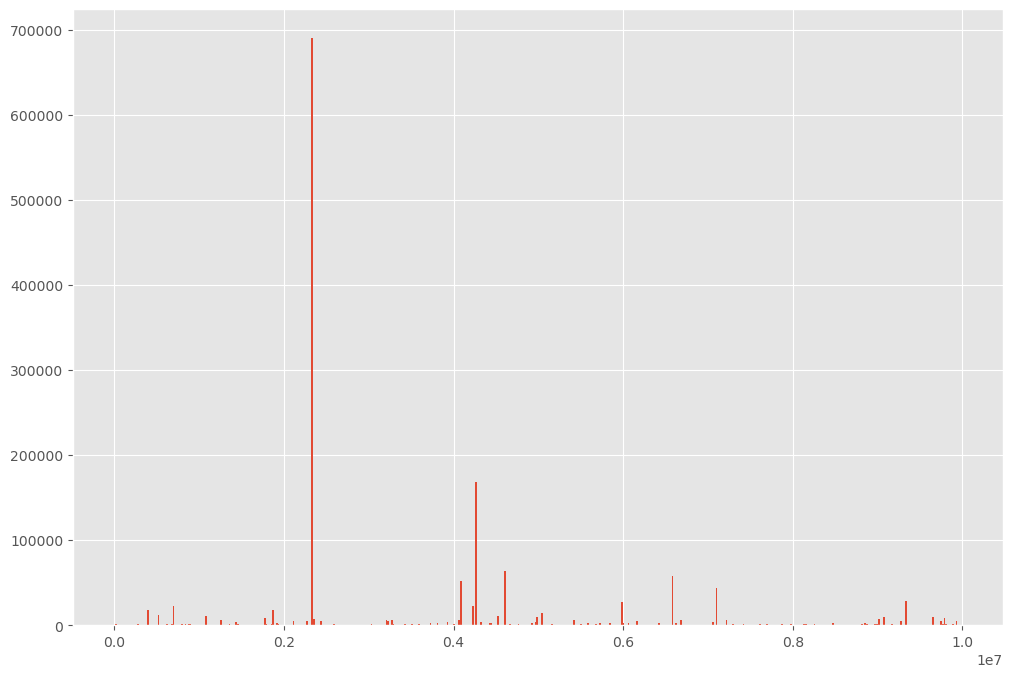

In [19]:
# prev_snd_org_id - предыдущий грузоотправитель (идентификатор)
df['prev_snd_org_id'].hist(bins=500)

In [20]:
df['prev_snd_org_id'].value_counts()

2327070    689723
4272291    136946
4597939     63796
6572170     58309
4097118     51389
            ...  
5531930         1
2902829         1
5113134         1
8419987         1
8557560         1
Name: prev_snd_org_id, Length: 1258, dtype: int64

<AxesSubplot: >

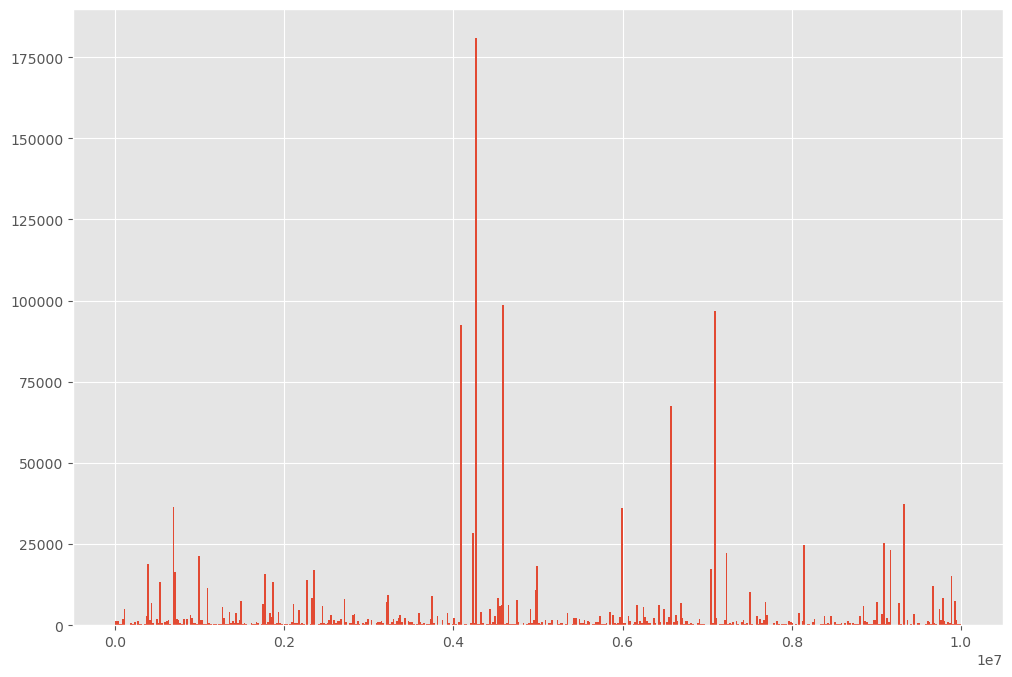

In [21]:
# prev_rsv_org_id - предыдущий грузополучатель (идентификатор)
df['prev_rsv_org_id'].hist(bins=500)

<AxesSubplot: >

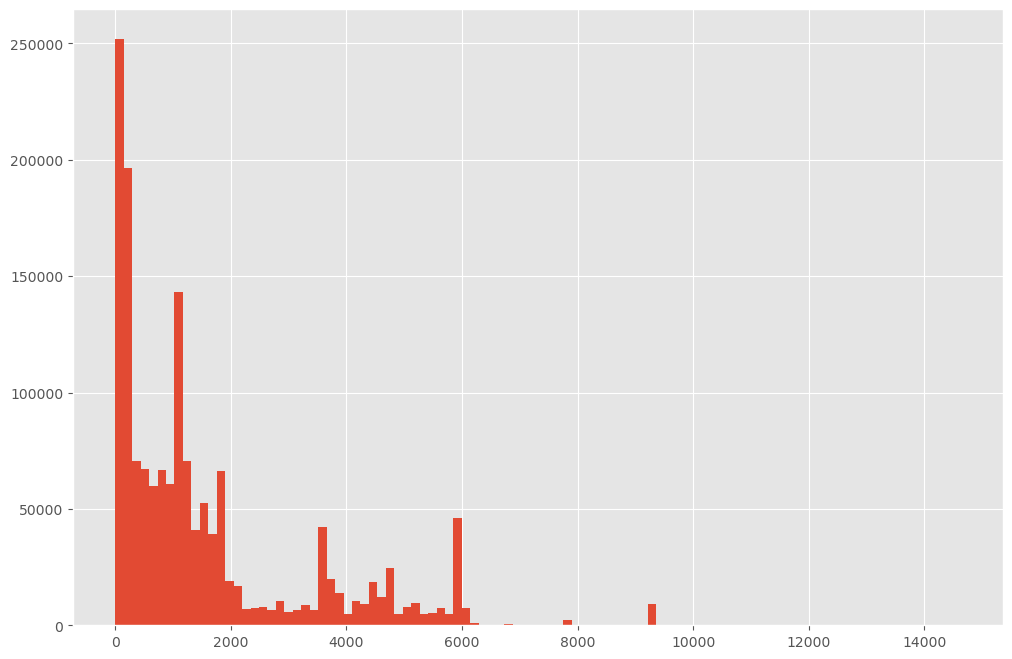

In [22]:
df['prev_distance'].hist(bins=100)

In [23]:
df[df['prev_distance']==0]

,wagnum,prev_fr_id,prev_is_load,prev_date_depart,prev_date_arrival,prev_snd_org_id,prev_rsv_org_id,prev_distance,snd_st_id,rsv_st_id,...,prev_date_depart_ismissing,prev_date_arrival_ismissing,prev_distance_ismissing,distance_ismissing,prev_freight_ismissing,prev_fr_group_ismissing,freight_ismissing,fr_group_ismissing,target_ismissing,num_missing
30,276,9276341,0.0,2022-05-21 11:01:21,2022-05-21 11:23:18,2327070,4597939,0.0,5821322,1565895,...,False,False,False,False,False,False,False,False,False,0
824,5476,9276341,0.0,2022-09-08 23:49:33,2022-09-09 20:32:04,2327070,5129535,0.0,6053445,7192993,...,False,False,False,False,False,False,False,False,False,0
1157,8373,9276341,0.0,2022-08-01 04:39:11,2022-08-01 04:54:16,2327070,6907865,0.0,4224949,5821322,...,False,False,False,False,False,False,False,False,False,0
1205,8793,1399685,0.0,2022-08-08 14:00:00,2022-08-10 11:11:00,4266126,4266126,0.0,8441276,5821322,...,False,False,False,False,False,False,False,False,False,0
1549,10316,1399685,0.0,2022-07-29 06:13:00,2022-07-30 21:37:00,4266126,4266126,0.0,8441276,445464,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558577,9985995,9276341,0.0,2022-04-18 23:13:43,2022-04-19 00:04:08,2327070,5985094,0.0,6697432,9716559,...,False,False,False,False,False,False,False,False,False,0
1558643,9986203,9276341,0.0,2022-05-09 02:28:44,2022-05-09 02:43:48,2327070,6907865,0.0,4224949,95805,...,False,False,False,False,False,False,False,False,False,0
1559355,9991043,9276341,0.0,2022-05-19 03:03:45,2022-05-19 03:30:27,2327070,4756239,0.0,5821322,5821322,...,False,False,False,False,False,False,False,False,False,0
1559445,9991723,9276341,0.0,2022-04-22 18:11:17,2022-04-22 18:21:06,2327070,4756239,0.0,5821322,5821322,...,False,False,False,False,False,False,False,False,False,0


<AxesSubplot: >

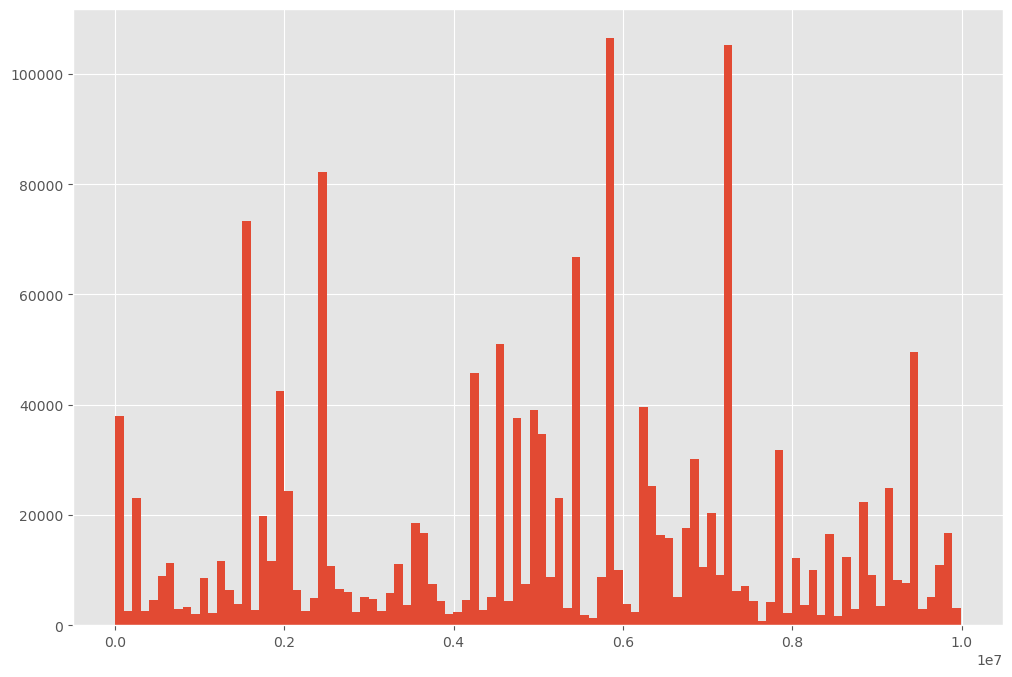

In [24]:
df['snd_st_id'].hist(bins=100)

Вид собственности

In [25]:
df['vidsobst'].value_counts()

Собственные          1195104
Принятые в аренду     362322
Name: vidsobst, dtype: int64

In [26]:
df[df['vidsobst']=='Собственные']['target'].mean()

93.95328607384796

In [27]:
df[df['vidsobst']=='Принятые в аренду']['target'].mean()

88.22017708005586

In [28]:
snd_org_id = df['snd_org_id'].unique()
len(snd_org_id)

1268

In [29]:
fr_group = df['fr_group'].unique()
fr_group

array(['Остальные грузы', 'Лесные грузы', 'Нефтяные грузы',
       'Хлебные грузы', 'Минерально-строит.', 'Руды  всякие',
       'Уголь каменный', 'Кокс каменноугольный'], dtype=object)

Взаимосвязь поставщика и типа грузов

<AxesSubplot: >

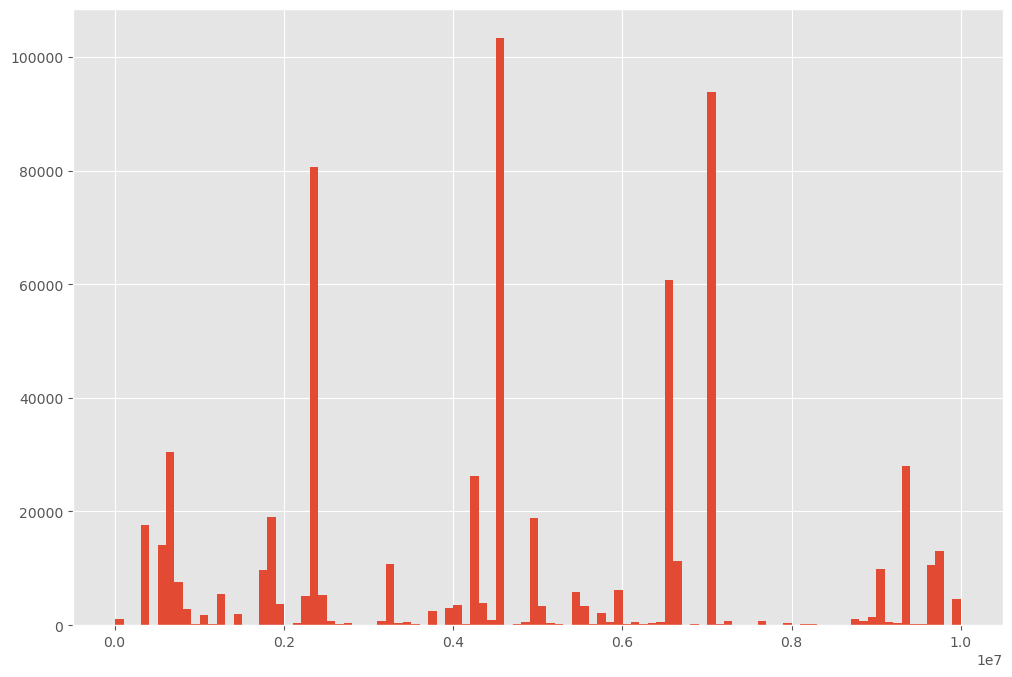

In [31]:
df[df['fr_group']== 'Остальные грузы']['snd_org_id'].hist(bins=100)


<AxesSubplot: >

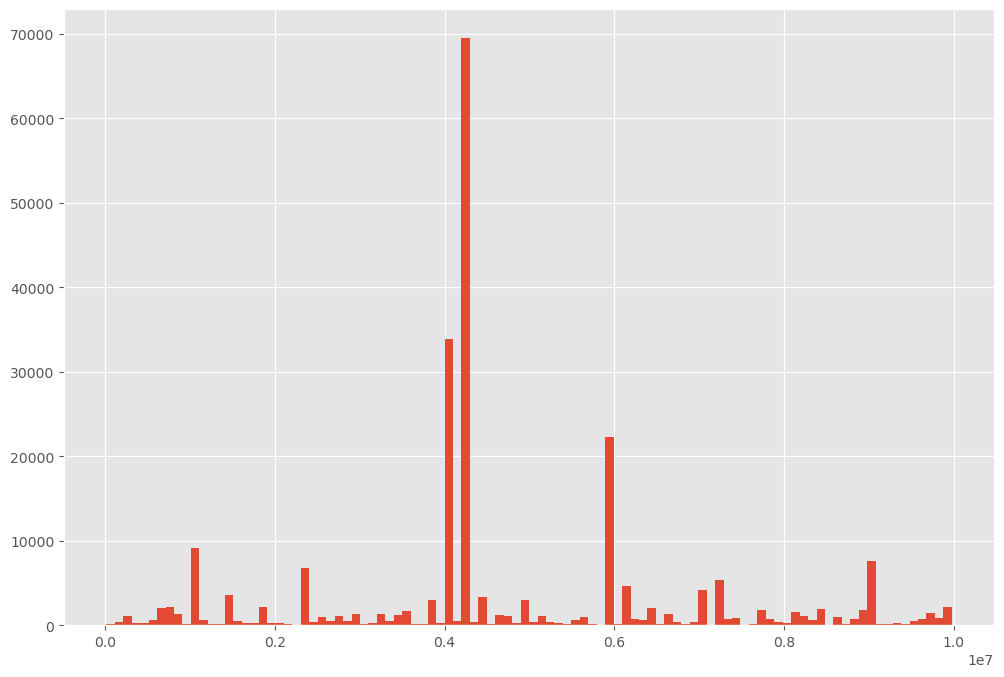

In [32]:
df[df['fr_group']== 'Лесные грузы']['snd_org_id'].hist(bins=100)

<AxesSubplot: >

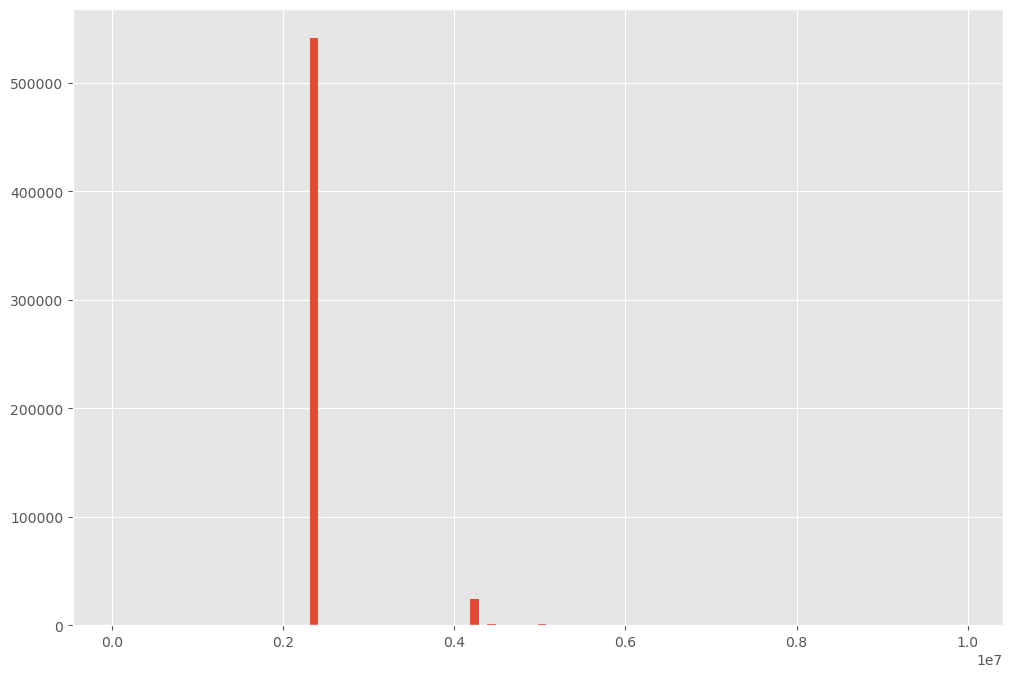

In [33]:
df[df['fr_group']== 'Нефтяные грузы']['snd_org_id'].hist(bins=100)

<AxesSubplot: >

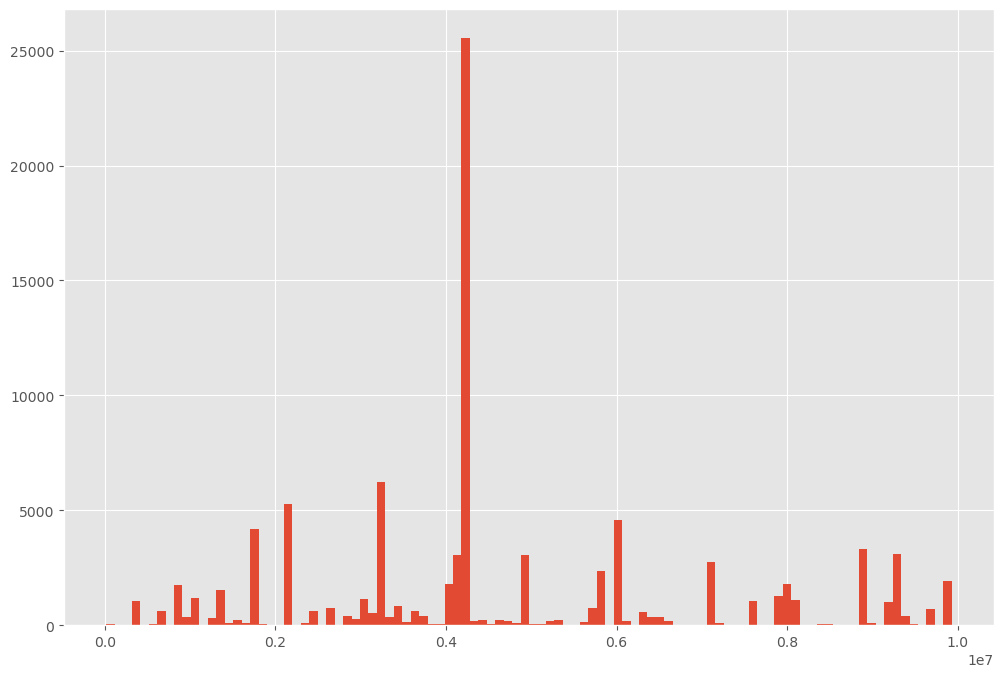

In [34]:
df[df['fr_group']== 'Хлебные грузы']['snd_org_id'].hist(bins=100)

<AxesSubplot: >

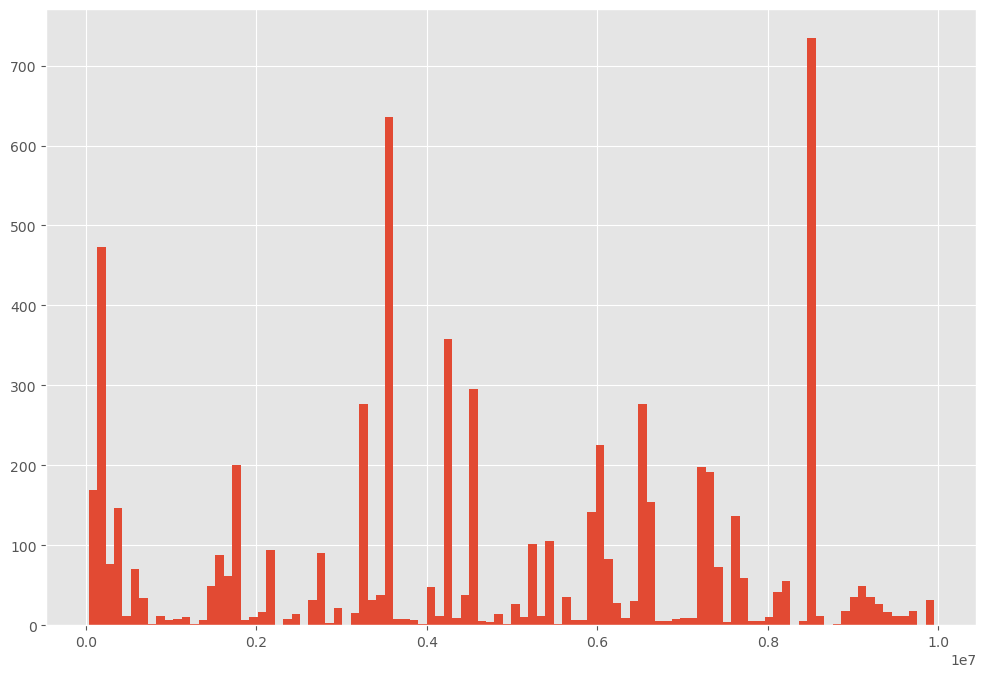

In [35]:
df[df['fr_group']== 'Минерально-строит.']['snd_org_id'].hist(bins=100)

<AxesSubplot: >

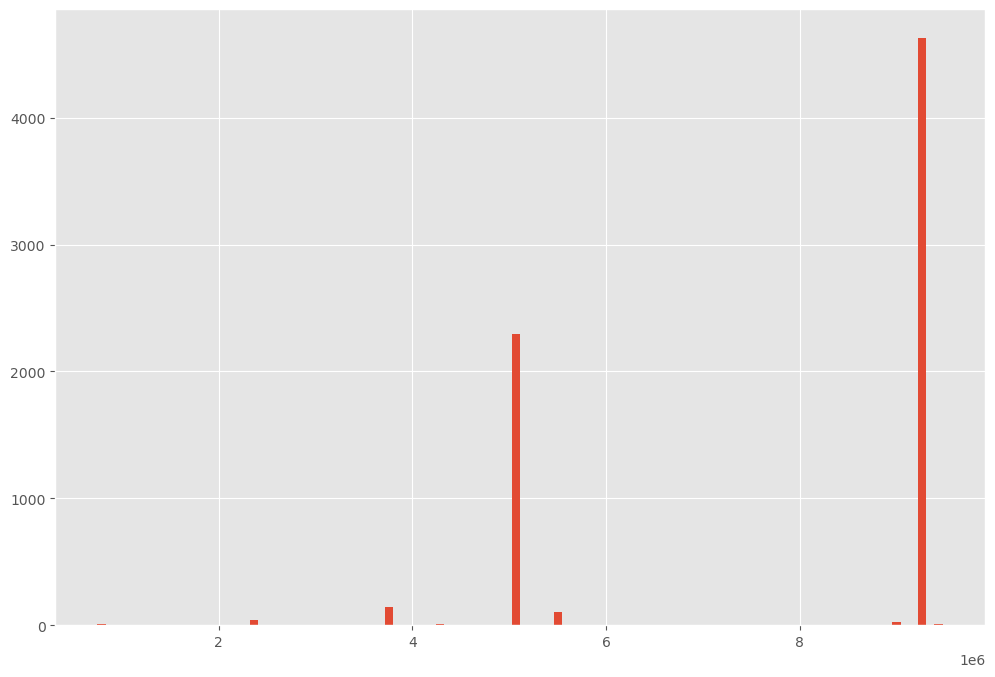

In [36]:
df[df['fr_group']== 'Руды  всякие']['snd_org_id'].hist(bins=100)

<AxesSubplot: >

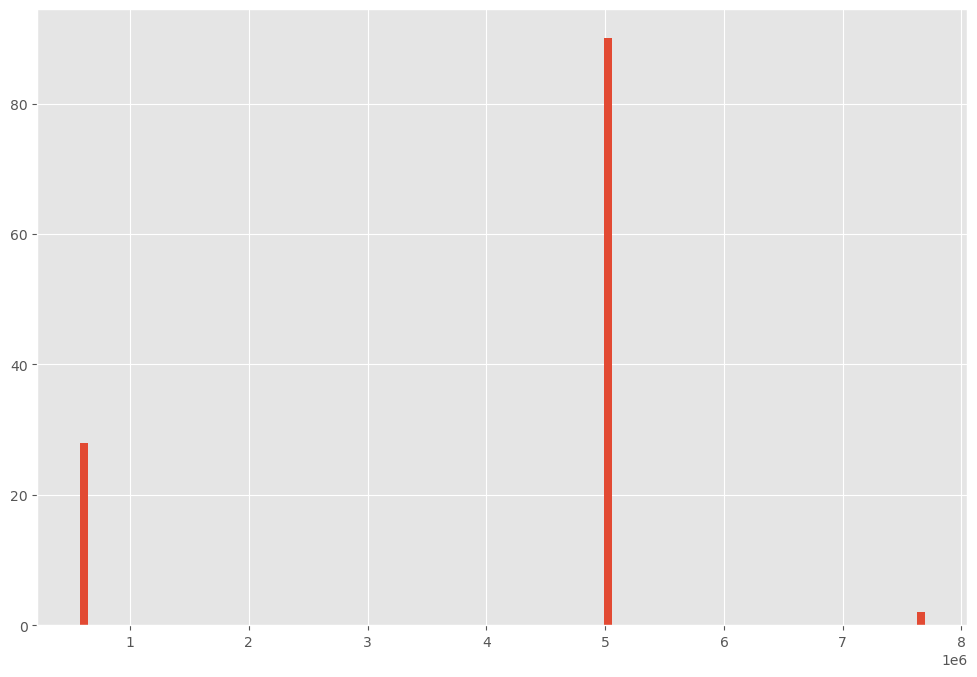

In [37]:
#Кокс каменноугольный
df[df['fr_group']== 'Кокс каменноугольный']['snd_org_id'].hist(bins=100)


<AxesSubplot: >

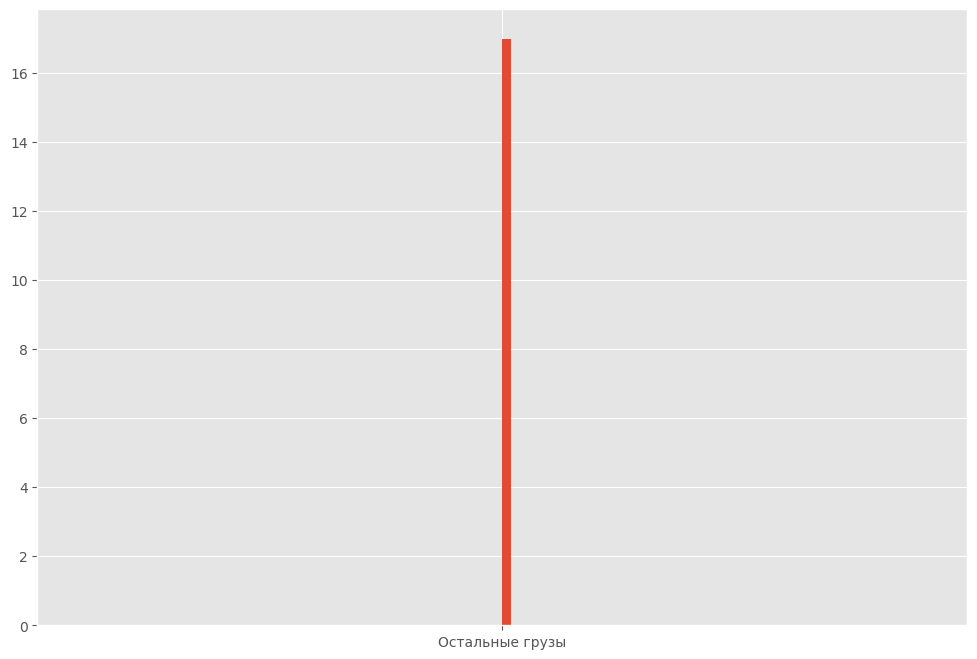

In [38]:
df[df['snd_org_id']== 7541996]['fr_group'].hist(bins=100)

<AxesSubplot: >

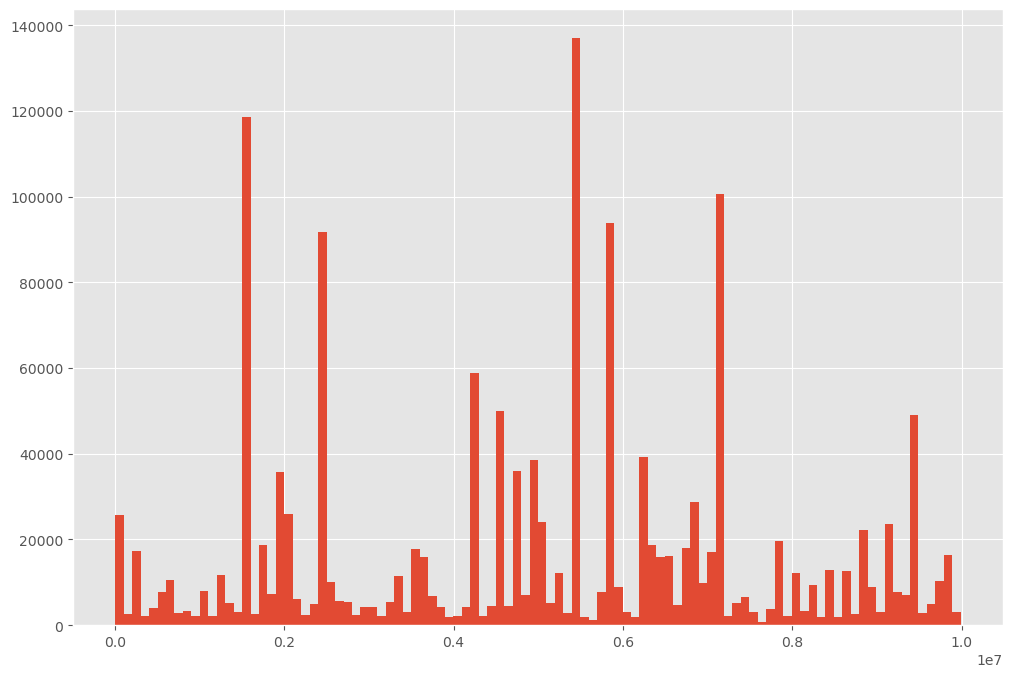

In [39]:
df['rsv_st_id'].hist(bins=100)

<AxesSubplot: >

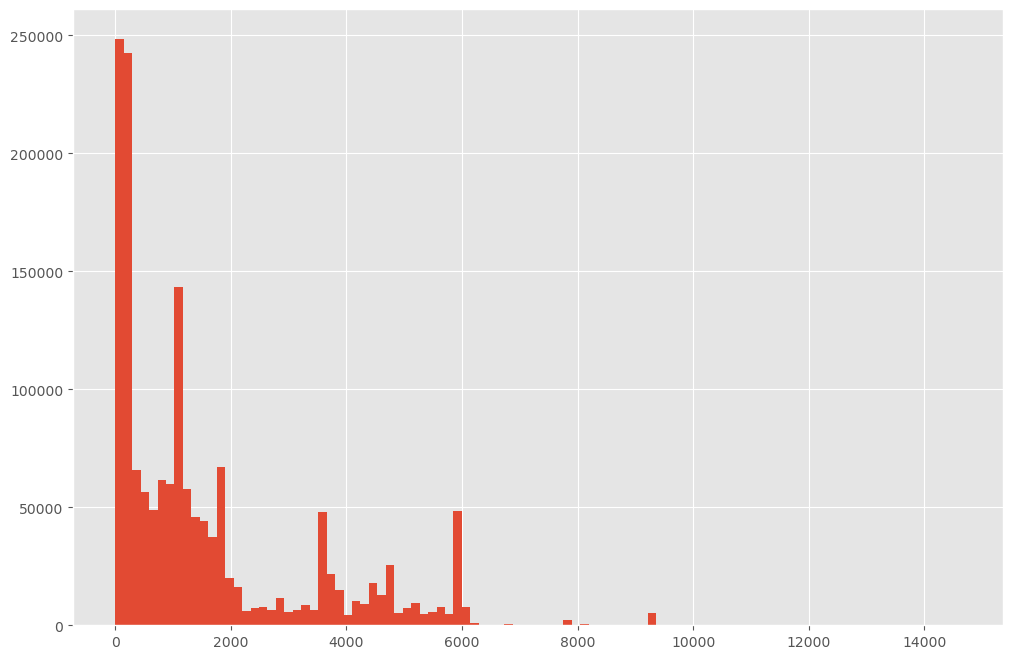

In [40]:
df['distance'].hist(bins=100)

<AxesSubplot: >

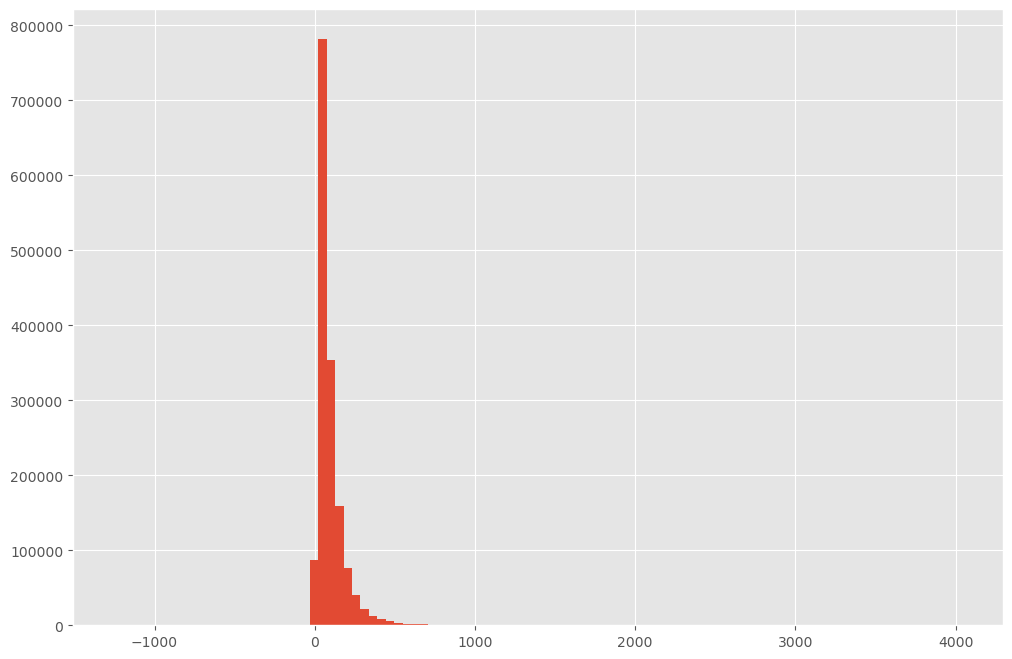

In [41]:
df['target'].hist(bins=100)

<AxesSubplot: >

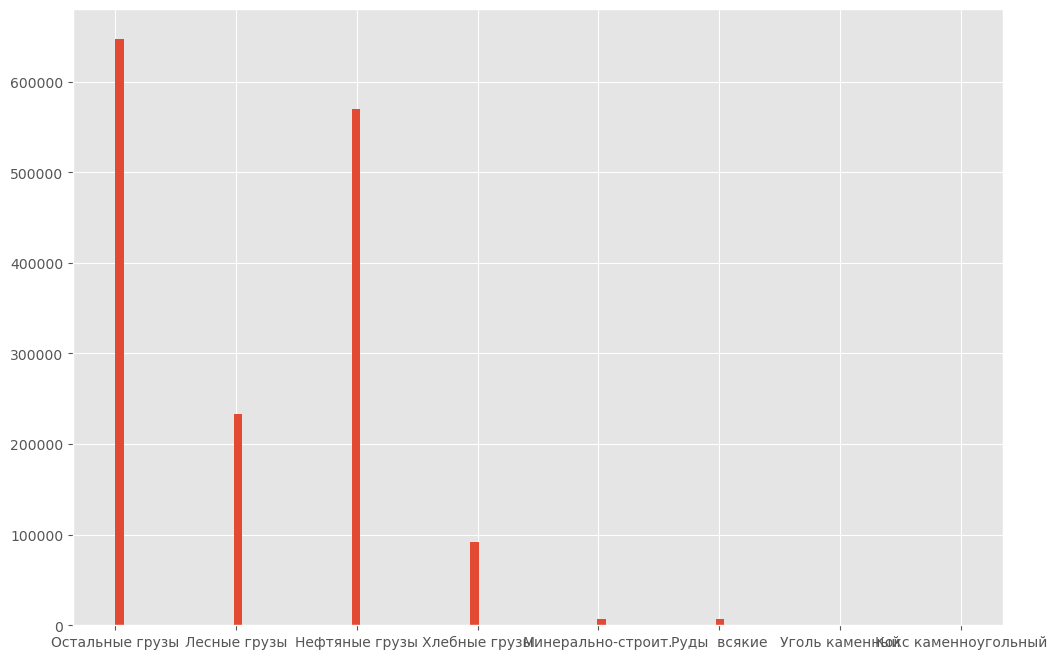

In [42]:
df['fr_group'].hist(bins=100)

In [47]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

rod: 100.00000%
8    1560699
Name: rod, dtype: int64



In [48]:
df = df.drop(["rod"],  axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560699 entries, 0 to 1560698
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   wagnum             1560699 non-null  int64  
 1   prev_fr_id         1560699 non-null  int64  
 2   prev_is_load       1560699 non-null  float64
 3   prev_date_depart   1560695 non-null  object 
 4   prev_date_arrival  1560451 non-null  object 
 5   prev_snd_org_id    1560699 non-null  int64  
 6   prev_rsv_org_id    1560699 non-null  int64  
 7   prev_distance      1559345 non-null  float64
 8   snd_st_id          1560699 non-null  int64  
 9   rsv_st_id          1560699 non-null  int64  
 10  fr_id              1560699 non-null  int64  
 11  is_load            1560699 non-null  int64  
 12  date_depart        1560699 non-null  object 
 13  common_ch          1560699 non-null  float64
 14  vidsobst           1560699 non-null  object 
 15  snd_org_id         1560699 non-n

In [50]:
cols = ['mes_id','axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = xgb.XGBRegressor()#RandomForestRegressor() #GradientBoostingRegressor()#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_absolute_error(y_test, y_pred)

In [ ]:
x_test

In [ ]:
y_train_pred = model.predict(x_train)
error = np.abs(y_train_pred - y_train)
error.hist()
mask = error<20000
model = xgb.XGBRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train[mask],y_train[mask])
y_pred = model.predict(x_test)
mean_absolute_error(y_test, y_pred)

In [ ]:
df_with_new_features =  pd.read_csv('data/with_new_features.csv')

In [ ]:
train_csv = pd.read_csv('data/with_new_features.csv')

In [ ]:
df

In [ ]:
import seaborn as sns
sns.heatmap(df_with_new_features.corr())

In [ ]:
df_with_new_features['target'].hist(bins=1000)

In [ ]:
freq = df_with_new_features['target'].value_counts().to_numpy()

In [ ]:
area = freq.sum()*(0.5)

In [ ]:
area/(500)

In [ ]:
data = df['target'].to_numpy().tolist()
data

In [ ]:
df['target'].describe()

In [ ]:
df['target'].value_counts()

In [ ]:
100* df_with_new_features[(df_with_new_features['target']<=12)]['target'].value_counts().sum() / df_with_new_features['target'].value_counts().sum()

In [ ]:
df_test = pd.read_csv('data/test.csv')

In [ ]:
df_test['date_depart']

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


get_best_distribution(data)
